In [16]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [ ]:
pip install yahoo_fin

# Importing the hisotical data
for cryptos that value more than 1 Billion as Market Cap on 31/8/2021 for the dates between 1/3/2020-31/8/2021 

In [18]:
df = pd.read_csv('/Users/abdullahdado/Desktop/FinTech:python/research/Final /final final/closing price.csv')
df=df.set_index(df['Date'], drop=False, append=False, inplace=False, verify_integrity=False).drop('Date', 1)
df.index = pd.to_datetime(df.index)

In [19]:
df.tail()

,Bitcoin,Ethereum,Cardano,Binance Coin,XRP,Dogecoin,Solana,Polkadot,Uniswap,Terra,...,Qtum,Basic Attention,Ravencoin,Telcoin,Perpetual Protocol,KuCoin Token,Nexo,Horizen,Bancor,Audius
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-27,49058.67,3270.60,2.94,494.50,1.19,0.2944,88.09,26.57,27.37,32.66,...,12.85,0.8446,0.1356,0.02416,17.21,13.34,1.93,86.82,4.34,2.54
2021-08-28,48902.40,3244.40,2.85,486.20,1.15,0.2856,96.70,25.97,26.82,34.96,...,12.60,0.8176,0.1303,0.02317,17.93,13.56,1.91,83.28,4.24,2.92
2021-08-29,48829.83,3227.00,2.86,480.28,1.14,0.2811,94.47,25.73,26.81,33.33,...,12.96,0.8137,0.1307,0.02297,18.69,13.39,1.85,87.94,4.23,2.83
2021-08-30,47054.98,3224.37,2.73,459.49,1.10,0.2721,110.54,26.04,26.78,33.47,...,12.19,0.7937,0.1257,0.02165,21.39,13.28,1.84,87.34,4.17,2.50
2021-08-31,47166.69,3433.73,2.77,464.42,1.19,0.2785,108.48,31.47,29.42,31.56,...,12.44,0.8161,0.1285,0.02125,20.18,13.29,1.87,92.16,4.31,2.47


# The performance
(closing price line chart) between 1/3/2020-31/8/2021 for the higher 6 cryptos capital on 31, Agust 

In [20]:
Top_6= df[df.columns[0:6]]

In [21]:
Top_6.head().round(7)

,Bitcoin,Ethereum,Cardano,Binance Coin,XRP,Dogecoin
Date,,,,,,
2020-03-01,8562.45,218.97,0.04593,18.96,0.2288,0.002275
2020-03-02,8869.67,230.57,0.04895,19.81,0.2387,0.002349
2020-03-03,8787.79,224.48,0.04876,19.64,0.2344,0.002499
2020-03-04,8755.25,224.52,0.04900,19.96,0.2345,0.002398
2020-03-05,9078.76,229.27,0.05106,20.80,0.2396,0.002506


<Figure size 720x288 with 0 Axes>

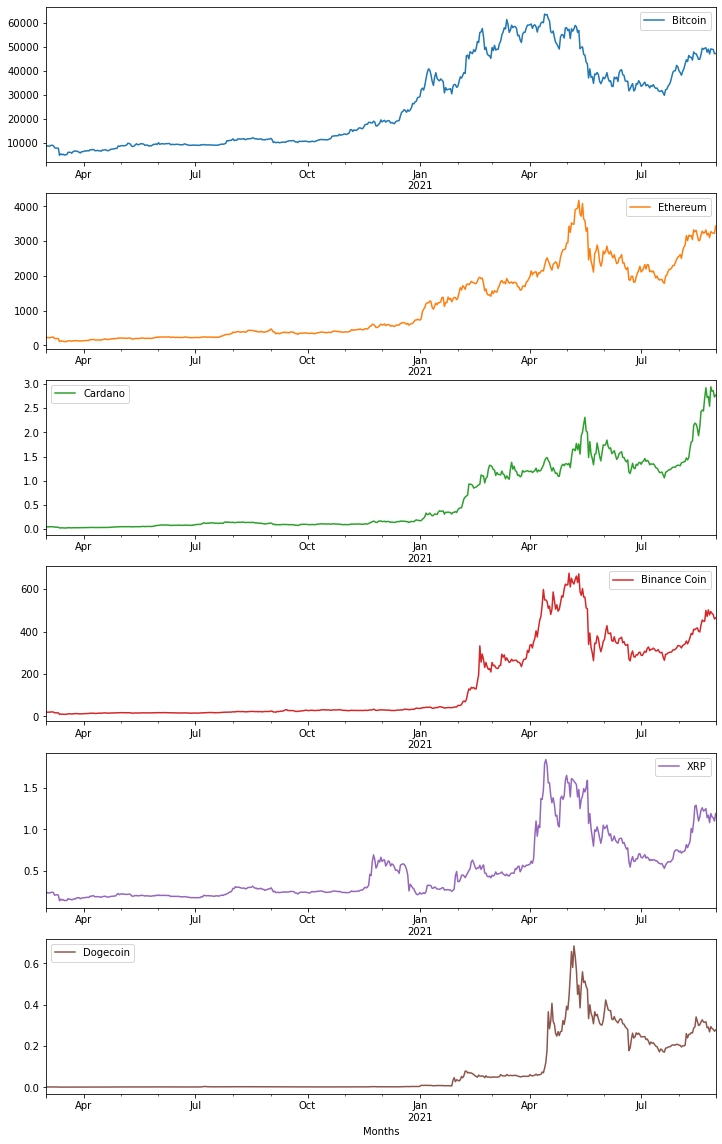

In [22]:
plt.figure(figsize=(10,4))
Top_6.plot(figsize=(12, 20), subplots= True, layout=(6, 1), sharex=False)
plt.xlabel('Months')
plt.legend(loc='upper left')

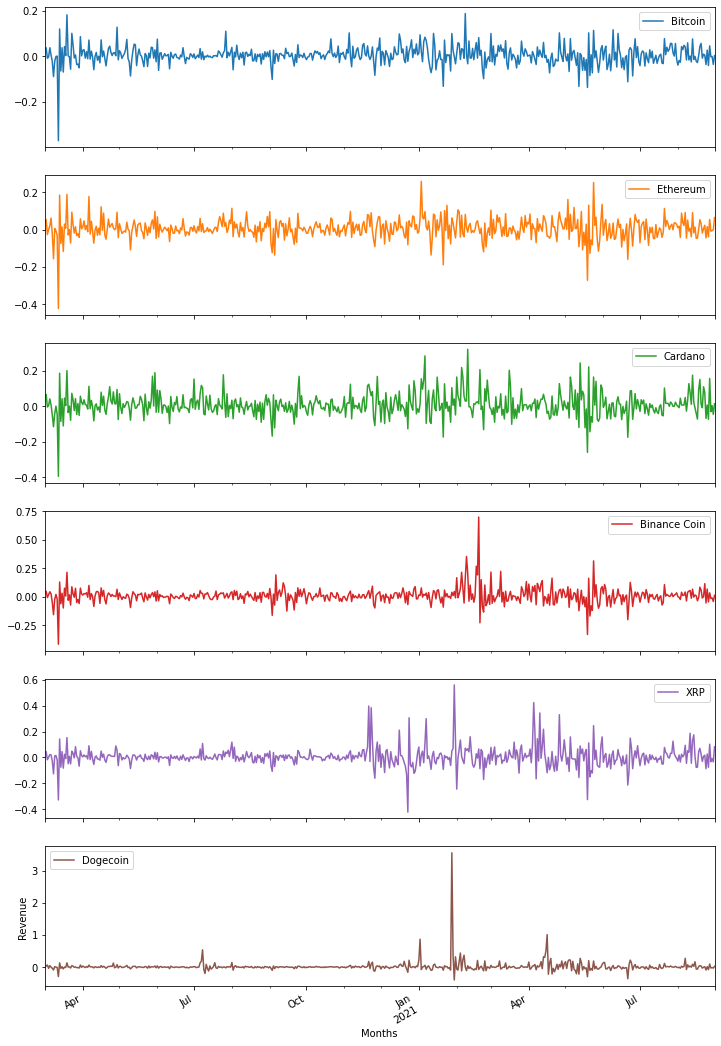

In [23]:
dfs1 = Top_6.resample(str(1)+'d', label='left').last()
Top_6_rets = np.divide((dfs1 - dfs1.shift(1)), dfs1.shift(1))
Top_6_rets.plot(figsize=(12, 20), subplots=True)
plt.xlabel('Months')
plt.ylabel('Revenue')
plt.legend(loc='upper left')
#plt.title('line chart 03/2020-08/2021 for the crypto return')

In [26]:
dfs1.describe()

,Bitcoin,Ethereum,Cardano,Binance Coin,XRP,Dogecoin
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,26091.890346,1162.050273,0.615040,151.082240,0.492373,0.087130
std,17876.378534,1049.804049,0.695583,181.669172,0.377720,0.138359
min,4970.790000,110.610000,0.023960,9.390000,0.139600,0.001537
25%,9729.040000,245.020000,0.093330,18.670000,0.219200,0.002601
50%,18621.310000,569.350000,0.148200,30.490000,0.294000,0.003517
75%,39747.510000,1989.740000,1.220000,300.500000,0.625600,0.172300
max,63503.460000,4168.700000,2.940000,675.680000,1.840000,0.684800


In [27]:
def normalize_data(df):
    # df on input should contain only one column with the price data (plus dataframe index)
    min = df.min()
    max = df.max()
    x = df 
    
    # time series normalization part
    # y will be a column in a dataframe
    y = (x - min) / (max - min)
    
    return y

In [28]:
pd.options.mode.chained_assignment = None  # default='warn'
Top_6['normBitcoin'] = normalize_data(Top_6['Bitcoin'])
Top_6['normEthereum'] = normalize_data(Top_6[Top_6.columns[1]])
Top_6['normCardano'] = normalize_data(Top_6[Top_6.columns[2]])
Top_6['normBinanceCoin'] = normalize_data(Top_6[Top_6.columns[3]])
Top_6['normXRP'] = normalize_data(Top_6[Top_6.columns[4]])
Top_6['normDogecoin'] = normalize_data(Top_6[Top_6.columns[5]])

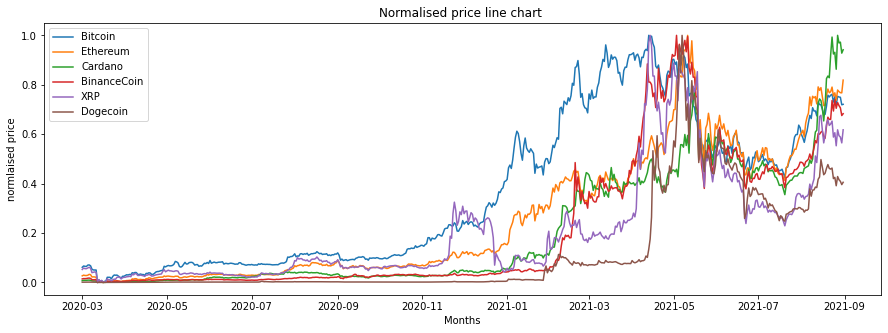

In [29]:
plt.figure(figsize=(15,5))
plt.title('Normalised price line chart ')
plt.plot(Top_6['normBitcoin'],label='Bitcoin')
plt.plot(Top_6['normEthereum'],label='Ethereum')
plt.plot(Top_6['normCardano'], label='Cardano')
plt.plot(Top_6['normBinanceCoin'], label='BinanceCoin')
plt.plot(Top_6['normXRP'], label='XRP')
plt.plot(Top_6['normDogecoin'], label='Dogecoin')
plt.xlabel('Months')
plt.ylabel('normlaised price')
plt.legend(loc='upper left')
#Top_6.plot(figsize=(12, 20), subplots= True, layout=(6, 1), sharex=False)


In [30]:
   def multiplyList(myList) :
     
    # Multiply elements one by one
    result = 1
    for x in myList:
         result = result * x
    return result

# Constructing the portfolios

Daily Momentum portfolio

The last 13 winers return in the reblancing day
Series([], Name: 2020-03-02 00:00:00, dtype: float64)
Profit percentage:0.0
portfolio balance sub-total:100.0
----- new line ------
The last 13 winers return in the reblancing day
Kusama             -0.044199
Nexo               -0.060359
Algorand           -0.007766
Decentraland        0.030751
Hedera Hashgraph    0.084378
Bitcoin SV         -0.019609
Bitcoin Gold       -0.003996
Stacks              0.041022
NEM                 0.006354
Synthetix          -0.107378
Cosmos             -0.013587
Polygon             0.105982
Chainlink           0.085308
Name: 2020-03-03 00:00:00, dtype: float64
Profit percentage:0.0057153875196502835
portfolio balance sub-total:100.57153875196502
----- new line ------
The last 13 winers return in the reblancing day
Polygon             0.068143
Chainlink           0.013100
Hedera Hashgraph    0.008432
Dogecoin           -0.040416
Celsius             0.035303
Stacks              0.098141
THETA               0.

The last 13 winers return in the reblancing day
Klaytn             0.087970
Theta Fuel         0.026902
Basic Attention    0.053520
KuCoin Token       0.000000
Decentraland       0.026743
Decred             0.179458
Crypyo.com Coin   -0.002962
Kusama             0.230100
Revain            -0.007449
Helium            -0.019608
Filecoin           0.037704
Enjin Coin         0.067362
XinFin Network    -0.017888
Name: 2020-08-22 00:00:00, dtype: float64
Profit percentage:0.048480454280712904
portfolio balance sub-total:268.6523387247417
----- new line ------
The last 13 winers return in the reblancing day
Polkadot        -0.113839
Kusama          -0.040239
Decred          -0.061722
Chainlink       -0.049499
Cosmos           0.322981
Fantom           0.039851
Neo             -0.039071
yearn.finance   -0.109328
NEM              0.173250
Arweave          0.133956
Qtum            -0.038369
Synthetix       -0.022298
Stacks           0.036052
Name: 2020-08-23 00:00:00, dtype: float64
Profit perc

Profit percentage:0.0182696203503534
portfolio balance sub-total:237.45321660541273
----- new line ------
The last 13 winers return in the reblancing day
Bitcoin BEO2       0.005500
Nexo               0.039413
Compound          -0.096714
Audius            -0.076428
Dogecoin           0.034316
NEM                0.084436
Litecoin           0.083399
Elrond             0.089738
Bitcoin            0.014593
Wrapped Bitcoin    0.014379
Celsius            0.044610
Zcash             -0.004139
Uniswap            0.021680
Name: 2020-12-18 00:00:00, dtype: float64
Profit percentage:0.018121457644505234
portfolio balance sub-total:241.75621501267923
----- new line ------
The last 13 winers return in the reblancing day
The Graph          0.839554
Decred            -0.058609
Zilliqa            0.140018
Axie Infinity     -0.084021
Synthetix          0.001634
Helium            -0.013699
THETA             -0.009803
Terra              0.010526
Basic Attention   -0.018036
Elrond             0.044917
Poly

The last 13 winers return in the reblancing day
Revain           0.489976
UNUS SED LEO     0.077364
yearn.finance    0.329690
Telcoin         -0.087022
Quant            0.059308
Stellar          0.106731
Huobi Token      0.161446
Compound         0.095923
Ethereum         0.054756
Arweave          0.207358
OKB              0.055743
Amp              0.028060
Nexo             0.020997
Name: 2021-05-11 00:00:00, dtype: float64
Profit percentage:0.11472581812988936
portfolio balance sub-total:4782.497956735698
----- new line ------
The last 13 winers return in the reblancing day
Eos             -0.284621
Revain          -0.397554
yearn.finance   -0.209039
Polygon         -0.046729
Arweave          0.009695
Bitcoin Cash    -0.215647
Huobi Token      0.026971
Bitcoin SV      -0.236543
Tezos           -0.173239
Dash            -0.169936
Synthetix       -0.046171
Horizen         -0.101477
Axie Infinity   -0.164400
Name: 2021-05-12 00:00:00, dtype: float64
Profit percentage:-0.16286216314942858

Text(0.5, 1.0, 'Daily momentum portfolio balance line chart 03/2020-08/2021')

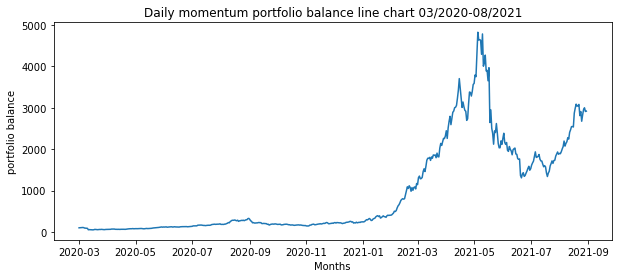

In [31]:
#Return Table for a time set 1, 7, 10 and 30 Days (Looking back period)
portfolio_days = 1
dfs = df.resample(str(portfolio_days)+'d', label='left').last()
rets = np.divide((dfs - dfs.shift(1)), dfs.shift(1))
rets.head().round(7)

time = []
position = []
Return_Mom1 = []



# The number of the portfolio cryptos 
numbercryptos = 13
# The initial investment $
portfoliobalance = 100
for index, row in rets.iterrows():
    rowdf = row.to_frame()
    cur_date = rowdf.columns[0]
    end_date = cur_date + datetime.timedelta(days=portfolio_days)
    lg = rowdf[cur_date].nlargest(numbercryptos)

    if end_date not in rets.index:
        break
    lg = rets.loc[end_date, lg.index.values]
    print('The last ' + str(numbercryptos) + ' winers return in the reblancing day')
    print(lg)
    lg_one= np.add(lg,1)
    portfoliobalance = portfoliobalance * np.power( multiplyList(lg_one) , (1/(numbercryptos)))
    #new
    Profit_percentage = str(np.power( multiplyList(lg_one) , (1/(numbercryptos)))-1)
    time.append(cur_date)
    position.append(portfoliobalance)
    #new
    Return_Mom1.append(Profit_percentage)
    print('Profit percentage:' + str(np.power( multiplyList(lg_one) , (1/(numbercryptos)))-1))
    print('portfolio balance sub-total:' + str(portfoliobalance))
    
    print('----- new line ------')
    


print('Final portfolio balance:' + str(portfoliobalance))

data1 = {'Date': time ,'Return': Return_Mom1}
data1p=  {'Date': time ,'portfolio balance': position}

plt.figure(figsize=(10,4))
plt.plot(time, position)
plt.xlabel('Months')
plt.ylabel('portfolio balance')
plt.title('Daily momentum portfolio balance line chart 03/2020-08/2021')

In [32]:
df1 = pd.DataFrame(data1)
df1=df1.set_index(df1['Date'], drop=False, append=False, inplace=False, verify_integrity=False).drop('Date', 1)
df1.index = pd.to_datetime(df1.index)
df1["Return"] = df1.Return.astype(float)
import seaborn as sns

In [33]:
dfnr = pd.DataFrame(df1, columns = ['Return']) 
nr = dfnr.mean() * 365
nv = dfnr.std() * (365 ** 0.5)
print('The annualised normal return for the daily Momentum portfolio is %.8f and its annulized volatility for the daily Momentum portfolio is %.8f' % (nr,nv))

The annualised normal return for the daily Momentum portfolio is 2.84749456 and its annulized volatility for the daily Momentum portfolio is 1.05922604


In [34]:
Sharpe_Ratio = (df1['Return'].mean() - 0.00004417989) / df1['Return'].std()
ASharpe_Ratio=(365**0.5) * Sharpe_Ratio
ASharpe_Ratio
print('The annualised Sharpe Ratio for daily Momentum portfolio '+str(ASharpe_Ratio))

The annualised Sharpe Ratio for daily Momentum portfolio 2.673054473375202


## Daily contrarian portfolio

The last 13 winers return in the reblancing day
Series([], Name: 2020-03-02 00:00:00, dtype: float64)
Profit percentage:0.0
portfolio balance sub-total:100.0
----- new line ------
The last 13 winers return in the reblancing day
Filecoin        0.012077
Telcoin        -0.137177
Chiliz          0.018707
UNUS SED LEO   -0.000628
THORChain      -0.032318
Terra          -0.023190
Horizen        -0.014706
Theta Fuel     -0.008630
Revain         -0.002214
Bitcoin BEO2   -0.010492
Dogecoin        0.063857
KuCoin Token    0.024390
Huobi Token    -0.025210
Name: 2020-03-03 00:00:00, dtype: float64
Profit percentage:-0.011451643954265345
portfolio balance sub-total:98.85483560457347
----- new line ------
The last 13 winers return in the reblancing day
Telcoin        0.129800
Synthetix      0.001907
Nexo           0.053241
Maker          0.010550
Quant          0.068452
OKB           -0.012774
Kusama        -0.008671
Monero        -0.002877
Neo            0.013805
THORChain     -0.045455
Ethereum 

portfolio balance sub-total:83.19176820569746
----- new line ------
The last 13 winers return in the reblancing day
Solana              0.010677
THORChain           0.073874
Synthetix          -0.042913
Zcash               0.002935
Theta Fuel          0.022222
Terra              -0.005601
Hedera Hashgraph    0.016907
UNUS SED LEO        0.009615
Dash                0.015118
Filecoin            0.011858
Basic Attention     0.081325
Maker               0.033028
Qtum                0.043478
Name: 2020-04-24 00:00:00, dtype: float64
Profit percentage:0.02049131572664109
portfolio balance sub-total:84.89647699385795
----- new line ------
The last 13 winers return in the reblancing day
Kusama         -0.054920
Synthetix       0.008907
Quant          -0.023853
Harmony         0.030940
Terra           0.005632
Stellar         0.008765
Binance Coin    0.018102
Zcash           0.012829
Bitcoin SV      0.001901
Chiliz          0.001178
Nexo           -0.068530
Bitcoin BEO2    0.021657
Bitcoin Gol

The last 13 winers return in the reblancing day
Polkadot         0.158690
yearn.finance    0.154130
Decred          -0.018358
Bancor          -0.010363
Chainlink        0.000659
THORChain        0.081590
Decentraland    -0.002279
IOTA             0.022580
Horizen          0.017149
Kusama           0.298584
Quant            0.018831
Neo             -0.002747
Qtum            -0.044888
Name: 2020-08-24 00:00:00, dtype: float64
Profit percentage:0.0479676537057252
portfolio balance sub-total:286.40097718981866
----- new line ------
The last 13 winers return in the reblancing day
NEM                0.024258
Fantom            -0.061309
Stacks            -0.076241
Qtum              -0.086162
Cosmos             0.034356
Zcash             -0.076371
Decred            -0.087792
Basic Attention   -0.124150
Bancor            -0.047120
UNUS SED LEO       0.000000
Celsius            0.069191
Neo               -0.057300
Decentraland      -0.062439
Name: 2020-08-25 00:00:00, dtype: float64
Profit perce

The last 13 winers return in the reblancing day
Solana           -0.106481
TRON              0.065665
XinFin Network    0.458863
XRP               0.106261
Decred            0.166384
BitTorrent        0.047237
Nexo              0.066077
Kusama            0.107654
THORChain         0.006329
Huobi Token       0.041580
Polygon           0.435635
Axie Infinity     0.074067
Klaytn            0.001520
Name: 2021-01-06 00:00:00, dtype: float64
Profit percentage:0.10326610113273049
portfolio balance sub-total:404.6689533746427
----- new line ------
The last 13 winers return in the reblancing day
Solana                0.227979
Celo                 -0.038793
Quant                 0.034305
Bitcoin BEO2          0.172293
Synthetix            -0.042079
PancakeSwap          -0.091745
OKB                   0.005405
Aave                 -0.000522
UNUS SED LEO         -0.007463
Celsius              -0.056478
Perpetual Protocol    0.018987
Amp                  -0.035646
Revain                0.000000
Na

portfolio balance sub-total:1850.9449096019537
----- new line ------
The last 13 winers return in the reblancing day
Internet Computer    -0.299624
Telcoin              -0.280827
XinFin Network       -0.026449
Perpetual Protocol   -0.013038
Celsius              -0.020950
Bitcoin BEO2         -0.117430
Bitcoin              -0.133217
Wrapped Bitcoin      -0.133280
Fantom               -0.235339
Nexo                 -0.066838
PancakeSwap          -0.201793
Harmony              -0.151685
Monero               -0.134831
Name: 2021-05-12 00:00:00, dtype: float64
Profit percentage:-0.14457483880266897
portfolio balance sub-total:1583.3448476636306
----- new line ------
The last 13 winers return in the reblancing day
Revain              -0.180372
Internet Computer    0.174293
Eos                  0.035992
Telcoin             -0.070720
Ethereum Classic     0.060536
Qtum                 0.054850
Bitcoin SV           0.053280
Fantom               0.033439
VeChain              0.106318
Dogecoin    

Text(0.5, 1.0, 'Daily contrarian portfolio balance line chart 03/2020-08/2021')

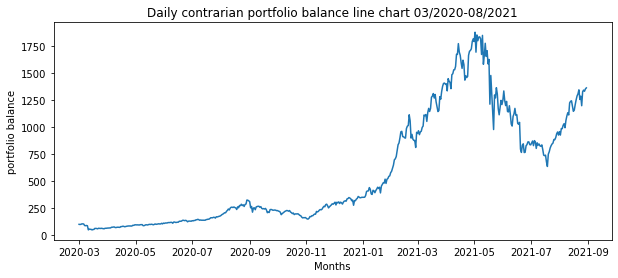

In [35]:
portfolio_days = 1
dfs = df.resample(str(portfolio_days)+'d', label='left').last()
rets = np.divide((dfs - dfs.shift(1)), dfs.shift(1))
rets.head().round(7)

time = []
position = []
Return_Mom1 = []



# The number of the portfolio cryptos 
numbercryptos = 13
# The initial investment $
portfoliobalance = 100
for index, row in rets.iterrows():
    rowdf = row.to_frame()
    cur_date = rowdf.columns[0]
    end_date = cur_date + datetime.timedelta(days=portfolio_days)
    lg = rowdf[cur_date].nsmallest(numbercryptos)

    if end_date not in rets.index:
        break
    lg = rets.loc[end_date, lg.index.values]
    print('The last ' + str(numbercryptos) + ' winers return in the reblancing day')
    print(lg)
    lg_one= np.add(lg,1)
    portfoliobalance = portfoliobalance * np.power( multiplyList(lg_one) , (1/(numbercryptos)))
    #new
    Profit_percentage = str(np.power( multiplyList(lg_one) , (1/(numbercryptos)))-1)
    time.append(cur_date)
    position.append(portfoliobalance)
    #new
    Return_Mom1.append(Profit_percentage)
    print('Profit percentage:' + str(np.power( multiplyList(lg_one) , (1/(numbercryptos)))-1))
    print('portfolio balance sub-total:' + str(portfoliobalance))
    
    print('----- new line ------')
    


print('Final portfolio balance:' + str(portfoliobalance))

data1 = {'Date': time ,'Return': Return_Mom1}
data1p=  {'Date': time ,'portfolio balance': position}

plt.figure(figsize=(10,4))
plt.plot(time, position)
plt.xlabel('Months')
plt.ylabel('portfolio balance')
plt.title('Daily contrarian portfolio balance line chart 03/2020-08/2021')

In [36]:
df1 = pd.DataFrame(data1)
df1=df1.set_index(df1['Date'], drop=False, append=False, inplace=False, verify_integrity=False).drop('Date', 1)
df1.index = pd.to_datetime(df1.index)
df1["Return"] = df1.Return.astype(float)
import seaborn as sns

In [37]:
dfnr = pd.DataFrame(df1, columns = ['Return']) 
nr = dfnr.mean() * 365
nv = dfnr.std() * (365 ** 0.5)
print('The annualised normal return for the daily Momentum portfolio is %.8f and its annulized volatility for the daily Momentum portfolio is %.8f' % (nr,nv))


The annualised normal return for the daily Momentum portfolio is 2.40420791 and its annulized volatility for the daily Momentum portfolio is 1.12314324


In [38]:
Sharpe_Ratio = (df1['Return'].mean() - 0.00004417989) / df1['Return'].std()
ASharpe_Ratio=(365**0.5) * Sharpe_Ratio
ASharpe_Ratio
print('The annualised Sharpe Ratio for daily Momentum portfolio '+str(ASharpe_Ratio))

The annualised Sharpe Ratio for daily Momentum portfolio 2.1262490650162733


# Constructing the portfolios 3

The last 13 winers return in the reblancing day
Series([], Name: 2020-03-04 00:00:00, dtype: float64)
Profit percentage:0.0
portfolio balance sub-total:100.0
----- new line ------
The last 13 winers return in the reblancing day
Hedera Hashgraph   -0.225376
Waves              -0.210145
Bitcoin Gold       -0.194705
Zilliqa            -0.151906
Fantom             -0.207591
Tezos              -0.202532
THORChain          -0.222991
Telcoin            -0.168919
KuCoin Token       -0.069930
Decentraland       -0.286939
Maker              -0.126374
Chiliz             -0.208110
Nexo               -0.182836
Name: 2020-03-07 00:00:00, dtype: float64
Profit percentage:-0.1906588351835553
portfolio balance sub-total:80.93411648164447
----- new line ------
The last 13 winers return in the reblancing day
Filecoin          -0.103604
Synthetix         -0.434096
UNUS SED LEO       0.007456
Revain            -0.555482
KuCoin Token      -0.165414
Quant             -0.507937
Horizen           -0.439159
Dog

The last 13 winers return in the reblancing day
THORChain            -0.044360
Perpetual Protocol   -0.058824
Terra                 0.005513
Elrond                0.148951
Ravencoin             0.320983
Axie Infinity        -0.057495
Stacks                0.022059
Compound              0.089310
BitTorrent            0.229219
PancakeSwap           0.037628
Chainlink             0.018189
Qtum                  0.361250
Bitcoin Gold          0.084677
Name: 2021-08-05 00:00:00, dtype: float64
Profit percentage:0.08128092050225977
portfolio balance sub-total:5267.5990295603315
----- new line ------
The last 13 winers return in the reblancing day
Internet Computer    0.156856
Qtum                -0.022957
OKB                 -0.045655
Ravencoin            0.398336
Dogecoin            -0.011525
BitTorrent          -0.003330
Filecoin            -0.036534
Holo                 0.249488
Arweave              0.082370
Huobi Token          0.028929
Uniswap              0.020220
Audius               0

Text(0.5, 1.0, 'Three days momentum portfolio balance line chart 03/2020-08/2021')

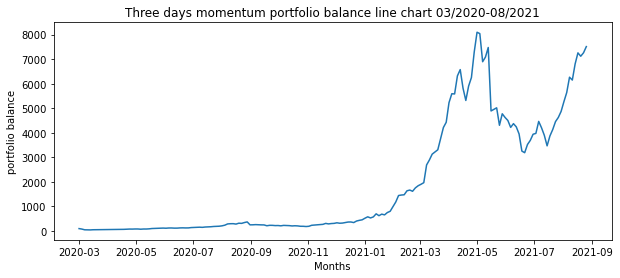

In [39]:
#Return Table for a time set 1, 7, 10 and 30 Days (Looking back period)
portfolio_days = 3
dfs = df.resample(str(portfolio_days)+'d', label='left').last()
rets = np.divide((dfs - dfs.shift(1)), dfs.shift(1))
rets.head().round(7)

time = []
position = []
Return_Mom1 = []



# The number of the portfolio cryptos 
numbercryptos = 13
# The initial investment $
portfoliobalance = 100
for index, row in rets.iterrows():
    rowdf = row.to_frame()
    cur_date = rowdf.columns[0]
    end_date = cur_date + datetime.timedelta(days=portfolio_days)
    lg = rowdf[cur_date].nlargest(numbercryptos)

    if end_date not in rets.index:
        break
    lg = rets.loc[end_date, lg.index.values]
    print('The last ' + str(numbercryptos) + ' winers return in the reblancing day')
    print(lg)
    lg_one= np.add(lg,1)
    portfoliobalance = portfoliobalance * np.power( multiplyList(lg_one) , (1/(numbercryptos)))
    #new
    Profit_percentage = str(np.power( multiplyList(lg_one) , (1/(numbercryptos)))-1)
    time.append(cur_date)
    position.append(portfoliobalance)
    #new
    Return_Mom1.append(Profit_percentage)
    print('Profit percentage:' + str(np.power( multiplyList(lg_one) , (1/(numbercryptos)))-1))
    print('portfolio balance sub-total:' + str(portfoliobalance))
    
    print('----- new line ------')
    


print('Final portfolio balance:' + str(portfoliobalance))

data1 = {'Date': time ,'Return': Return_Mom1}
data1p=  {'Date': time ,'portfolio balance': position}

plt.figure(figsize=(10,4))
plt.plot(time, position)
plt.xlabel('Months')
plt.ylabel('portfolio balance')
plt.title('Three days momentum portfolio balance line chart 03/2020-08/2021')

In [40]:
df1 = pd.DataFrame(data1)
df1=df1.set_index(df1['Date'], drop=False, append=False, inplace=False, verify_integrity=False).drop('Date', 1)
df1.index = pd.to_datetime(df1.index)
df1["Return"] = df1.Return.astype(float)
import seaborn as sns

In [41]:
dfnr = pd.DataFrame(df1, columns = ['Return']) 
nr = dfnr.mean() * (365/3)
nv = dfnr.std() * ((365/3) ** 0.5)
print('The annualised normal return for the daily Momentum portfolio is %.8f and its annulized volatility for the daily Momentum portfolio is %.8f' % (nr,nv))

The annualised normal return for the daily Momentum portfolio is 3.47483481 and its annulized volatility for the daily Momentum portfolio is 1.03129935


In [42]:
Sharpe_Ratio = (df1['Return'].mean() - 0.00004417989) / df1['Return'].std()
ASharpe_Ratio=((365/3)**0.5) * Sharpe_Ratio
ASharpe_Ratio
print('The annualised Sharpe Ratio for daily Momentum portfolio '+str(ASharpe_Ratio))

The annualised Sharpe Ratio for daily Momentum portfolio 3.364163474795872


## 3 days contrarian portfolio

The last 13 winers return in the reblancing day
Series([], Name: 2020-03-04 00:00:00, dtype: float64)
Profit percentage:0.0
portfolio balance sub-total:100.0
----- new line ------
The last 13 winers return in the reblancing day
Kusama             -0.120275
Synthetix           0.036683
Ethereum Classic   -0.154878
Filecoin            0.085575
Revain             -0.030998
Terra              -0.120472
Bitcoin SV         -0.187253
Dogecoin           -0.112981
OKB                -0.172727
Celsius            -0.219084
Crypyo.com Coin    -0.139559
NEM                -0.182337
Algorand           -0.266845
Name: 2020-03-07 00:00:00, dtype: float64
Profit percentage:-0.12690805949529516
portfolio balance sub-total:87.30919405047048
----- new line ------
The last 13 winers return in the reblancing day
Decentraland       -0.466228
Algorand           -0.485777
VeChain            -0.484653
Harmony            -0.525476
Hedera Hashgraph   -0.411258
Enjin Coin         -0.488930
THORChain          -0.17

The last 13 winers return in the reblancing day
Internet Computer    0.051818
Theta Fuel          -0.045688
THORChain            0.056897
THETA               -0.048000
Filecoin            -0.019059
Dogecoin            -0.055850
XRP                 -0.003806
Horizen              0.012662
Stellar             -0.033789
SushiSwap            0.088949
Qtum                -0.015559
Avalanche            0.080863
Chainlink            0.004923
Name: 2021-07-03 00:00:00, dtype: float64
Profit percentage:0.004609631128225544
portfolio balance sub-total:480.90588494582994
----- new line ------
The last 13 winers return in the reblancing day
Celo               -0.058065
XinFin Network     -0.123265
FTX Token           0.133622
Telcoin            -0.178352
Zcash              -0.018477
Dogecoin           -0.103627
Amp                 0.017374
THETA               0.033613
Theta Fuel          0.081586
Hedera Hashgraph   -0.070308
Audius              0.047065
Tezos              -0.045936
VeChain         

Profit percentage:-0.022969373498370915
portfolio balance sub-total:690.4766255587484
----- new line ------
The last 13 winers return in the reblancing day
XinFin Network        0.275835
Internet Computer     0.094321
Ravencoin            -0.000709
Perpetual Protocol    0.309507
Nexo                 -0.010811
The Graph             0.138812
FTX Token             0.053356
Holo                 -0.052817
Chiliz               -0.034415
Telcoin              -0.044776
Axie Infinity         0.082895
Polygon               0.027972
BitTorrent           -0.043205
Name: 2021-08-17 00:00:00, dtype: float64
Profit percentage:0.05546352331294102
portfolio balance sub-total:728.7728919774669
----- new line ------
The last 13 winers return in the reblancing day
Revain          0.090995
Theta Fuel      0.017189
Stacks          0.043165
NEM             0.021945
THETA           0.027972
Decred          0.076170
Holo            0.026952
Eos             0.034286
Bitcoin Gold    0.125039
IOTA            0.10

Text(0.5, 1.0, 'Three days contrarian portfolio balance line chart 03/2020-08/2021')

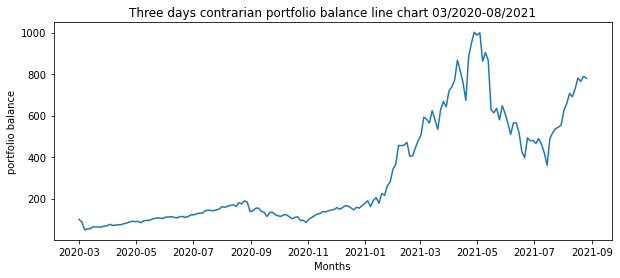

In [43]:
portfolio_days = 3
dfs = df.resample(str(portfolio_days)+'d', label='left').last()
rets = np.divide((dfs - dfs.shift(1)), dfs.shift(1))
rets.head().round(7)

time = []
position = []
Return_Mom1 = []



# The number of the portfolio cryptos 
numbercryptos = 13
# The initial investment $
portfoliobalance = 100
for index, row in rets.iterrows():
    rowdf = row.to_frame()
    cur_date = rowdf.columns[0]
    end_date = cur_date + datetime.timedelta(days=portfolio_days)
    lg = rowdf[cur_date].nsmallest(numbercryptos)

    if end_date not in rets.index:
        break
    lg = rets.loc[end_date, lg.index.values]
    print('The last ' + str(numbercryptos) + ' winers return in the reblancing day')
    print(lg)
    lg_one= np.add(lg,1)
    portfoliobalance = portfoliobalance * np.power( multiplyList(lg_one) , (1/(numbercryptos)))
    #new
    Profit_percentage = str(np.power( multiplyList(lg_one) , (1/(numbercryptos)))-1)
    time.append(cur_date)
    position.append(portfoliobalance)
    #new
    Return_Mom1.append(Profit_percentage)
    print('Profit percentage:' + str(np.power( multiplyList(lg_one) , (1/(numbercryptos)))-1))
    print('portfolio balance sub-total:' + str(portfoliobalance))
    
    print('----- new line ------')
    


print('Final portfolio balance:' + str(portfoliobalance))

data1 = {'Date': time ,'Return': Return_Mom1}
data1p=  {'Date': time ,'portfolio balance': position}

plt.figure(figsize=(10,4))
plt.plot(time, position)
plt.xlabel('Months')
plt.ylabel('portfolio balance')
plt.title('Three days contrarian portfolio balance line chart 03/2020-08/2021')

In [44]:
df1 = pd.DataFrame(data1)
df1=df1.set_index(df1['Date'], drop=False, append=False, inplace=False, verify_integrity=False).drop('Date', 1)
df1.index = pd.to_datetime(df1.index)
df1["Return"] = df1.Return.astype(float)
import seaborn as sns

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 182 entries, 2020-03-01 to 2021-08-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Return  182 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


In [46]:
dfnr = pd.DataFrame(df1, columns = ['Return']) 
nr = dfnr.mean() * (365/3)
nv = dfnr.std() * ((365/3) ** 0.5)
print('The annualised normal return for the daily Momentum portfolio is %.8f and its annulized volatility for the daily Momentum portfolio is %.8f' % (nr,nv))

The annualised normal return for the daily Momentum portfolio is 1.95600566 and its annulized volatility for the daily Momentum portfolio is 1.05880354


In [47]:
Sharpe_Ratio = (df1['Return'].mean() - 0.00004417989) / df1['Return'].std()
ASharpe_Ratio=((365/3)**0.5) * Sharpe_Ratio
ASharpe_Ratio
print('The annualised Sharpe Ratio for daily Momentum portfolio '+str(ASharpe_Ratio))

The annualised Sharpe Ratio for daily Momentum portfolio 1.8422968605607175


_______________

# Constructing the 10 days momentum portfolio 

The last 13 winers return in the reblancing day
Series([], Name: 2020-03-11 00:00:00, dtype: float64)
Profit percentage:0.0
portfolio balance sub-total:100.0
----- new line ------
The last 13 winers return in the reblancing day
Filecoin           -0.454054
UNUS SED LEO        0.051567
FTX Token           0.012658
OKB                -0.050114
Dash               -0.069538
NEM                -0.069556
KuCoin Token       -0.211667
Hedera Hashgraph   -0.161502
Enjin Coin          0.249163
Huobi Token         0.003049
Bitcoin SV          0.038109
Dogecoin            0.032713
Quant               0.685590
Name: 2020-03-21 00:00:00, dtype: float64
Profit percentage:-0.02541832879900141
portfolio balance sub-total:97.45816712009986
----- new line ------
The last 13 winers return in the reblancing day
Quant              0.266839
Enjin Coin         0.041693
Crypyo.com Coin    0.119739
Monero             0.250534
Synthetix          0.143687
Maker              0.152567
Telcoin            0.057143
St

Text(0.5, 1.0, 'Ten days momentum portfolio balance line chart 03/2020-08/2021')

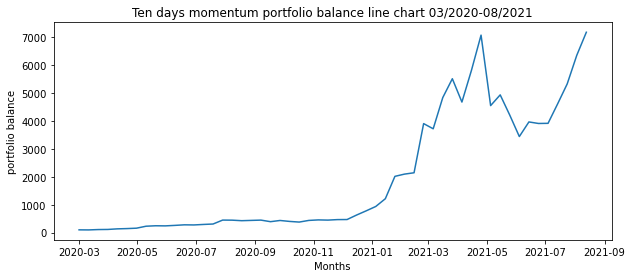

In [48]:
#Return Table for a time set 1, 7, 10 and 30 Days (Looking back period)
portfolio_days = 10
dfs = df.resample(str(portfolio_days)+'d', label='left').last()
rets = np.divide((dfs - dfs.shift(1)), dfs.shift(1))
rets.head().round(7)

time = []
position = []
Return_Mom1 = []



# The number of the portfolio cryptos 
numbercryptos = 13
# The initial investment $
portfoliobalance = 100
for index, row in rets.iterrows():
    rowdf = row.to_frame()
    cur_date = rowdf.columns[0]
    end_date = cur_date + datetime.timedelta(days=portfolio_days)
    lg = rowdf[cur_date].nlargest(numbercryptos)

    if end_date not in rets.index:
        break
    lg = rets.loc[end_date, lg.index.values]
    print('The last ' + str(numbercryptos) + ' winers return in the reblancing day')
    print(lg)
    lg_one= np.add(lg,1)
    portfoliobalance = portfoliobalance * np.power( multiplyList(lg_one) , (1/(numbercryptos)))
    #new
    Profit_percentage = str(np.power( multiplyList(lg_one) , (1/(numbercryptos)))-1)
    time.append(cur_date)
    position.append(portfoliobalance)
    #new
    Return_Mom1.append(Profit_percentage)
    print('Profit percentage:' + str(np.power( multiplyList(lg_one) , (1/(numbercryptos)))-1))
    print('portfolio balance sub-total:' + str(portfoliobalance))
    
    print('----- new line ------')
    


print('Final portfolio balance:' + str(portfoliobalance))

data1 = {'Date': time ,'Return': Return_Mom1}
data1p=  {'Date': time ,'portfolio balance': position}

plt.figure(figsize=(10,4))
plt.plot(time, position)
plt.xlabel('Months')
plt.ylabel('portfolio balance')
plt.title('Ten days momentum portfolio balance line chart 03/2020-08/2021')

In [49]:
df1 = pd.DataFrame(data1)
df1=df1.set_index(df1['Date'], drop=False, append=False, inplace=False, verify_integrity=False).drop('Date', 1)
df1.index = pd.to_datetime(df1.index)
df1["Return"] = df1.Return.astype(float)
import seaborn as sns

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54 entries, 2020-03-01 to 2021-08-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Return  54 non-null     float64
dtypes: float64(1)
memory usage: 864.0 bytes


In [51]:
dfnr = pd.DataFrame(df1, columns = ['Return']) 
nr = dfnr.mean() * (365/portfolio_days)
nv = dfnr.std() * ((365/portfolio_days) ** 0.5)
print('The annualised normal return for the daily Momentum portfolio is %.8f and its annulized volatility for the daily Momentum portfolio is %.8f' % (nr,nv))

The annualised normal return for the daily Momentum portfolio is 3.57788404 and its annulized volatility for the daily Momentum portfolio is 1.17992790


In [52]:
Sharpe_Ratio = (df1['Return'].mean() - 0.00004417989) / df1['Return'].std()
ASharpe_Ratio=((365/portfolio_days)**0.5) * Sharpe_Ratio
ASharpe_Ratio
print('The annualised Sharpe Ratio for daily Momentum portfolio '+str(ASharpe_Ratio))

The annualised Sharpe Ratio for daily Momentum portfolio 3.0309237399934763


## Ten days contrarian portfolio

The last 13 winers return in the reblancing day
Series([], Name: 2020-03-11 00:00:00, dtype: float64)
Profit percentage:0.0
portfolio balance sub-total:100.0
----- new line ------
The last 13 winers return in the reblancing day
Revain      -0.072289
Fantom       0.036128
Maker        0.156555
Polygon     -0.004617
Chainlink   -0.044444
Algorand    -0.010191
Chiliz       0.064425
Stacks       0.109467
Harmony     -0.034636
VeChain      0.043386
Holo         0.011229
THORChain   -0.010285
Ravencoin    0.006098
Name: 2020-03-21 00:00:00, dtype: float64
Profit percentage:0.017537439646717834
portfolio balance sub-total:101.75374396467178
----- new line ------
The last 13 winers return in the reblancing day
Filecoin            0.630363
KuCoin Token        0.051163
Hedera Hashgraph    0.147823
Waves               0.252258
Cosmos              0.303030
Revain             -0.012987
NEM                 0.067714
Dash                0.254009
Zcash               0.333874
OKB                 0.17506

Name: 2020-09-17 00:00:00, dtype: float64
Profit percentage:0.01064476097845346
portfolio balance sub-total:219.3963298487823
----- new line ------
The last 13 winers return in the reblancing day
Amp              -0.129023
KuCoin Token     -0.089861
Stacks           -0.124069
Klaytn           -0.095034
Elrond           -0.334612
Kusama           -0.224763
Holo             -0.081542
Polkadot         -0.135632
Decred           -0.066556
Bancor            0.058657
Harmony          -0.178670
XinFin Network   -0.070288
Tezos            -0.067568
Name: 2020-09-27 00:00:00, dtype: float64
Profit percentage:-0.12318382733786926
portfolio balance sub-total:192.3702502341277
----- new line ------
The last 13 winers return in the reblancing day
SushiSwap             0.021453
yearn.finance        -0.197207
Helium                0.170468
Uniswap               0.070671
Fantom               -0.027714
Elrond                0.064841
Synthetix             0.068493
Solana               -0.013761
THORChai

Text(0.5, 1.0, 'Ten days contrarian portfolio balance line chart 03/2020-08/2021')

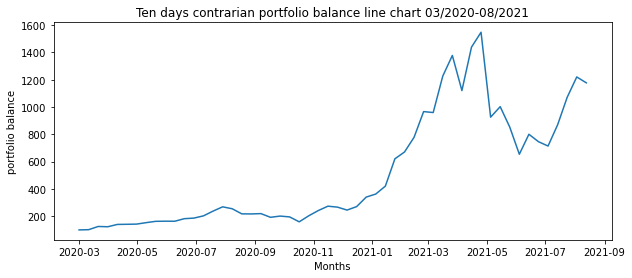

In [53]:
portfolio_days = 10
dfs = df.resample(str(portfolio_days)+'d', label='left').last()
rets = np.divide((dfs - dfs.shift(1)), dfs.shift(1))
rets.head().round(7)

time = []
position = []
Return_Mom1 = []



# The number of the portfolio cryptos 
numbercryptos = 13
# The initial investment $
portfoliobalance = 100
for index, row in rets.iterrows():
    rowdf = row.to_frame()
    cur_date = rowdf.columns[0]
    end_date = cur_date + datetime.timedelta(days=portfolio_days)
    lg = rowdf[cur_date].nsmallest(numbercryptos)

    if end_date not in rets.index:
        break
    lg = rets.loc[end_date, lg.index.values]
    print('The last ' + str(numbercryptos) + ' winers return in the reblancing day')
    print(lg)
    lg_one= np.add(lg,1)
    portfoliobalance = portfoliobalance * np.power( multiplyList(lg_one) , (1/(numbercryptos)))
    #new
    Profit_percentage = str(np.power( multiplyList(lg_one) , (1/(numbercryptos)))-1)
    time.append(cur_date)
    position.append(portfoliobalance)
    #new
    Return_Mom1.append(Profit_percentage)
    print('Profit percentage:' + str(np.power( multiplyList(lg_one) , (1/(numbercryptos)))-1))
    print('portfolio balance sub-total:' + str(portfoliobalance))
    
    print('----- new line ------')
    


print('Final portfolio balance:' + str(portfoliobalance))

data1 = {'Date': time ,'Return': Return_Mom1}
data1p=  {'Date': time ,'portfolio balance': position}

plt.figure(figsize=(10,4))
plt.plot(time, position)
plt.xlabel('Months')
plt.ylabel('portfolio balance')
plt.title('Ten days contrarian portfolio balance line chart 03/2020-08/2021')

In [54]:
df1 = pd.DataFrame(data1)
df1=df1.set_index(df1['Date'], drop=False, append=False, inplace=False, verify_integrity=False).drop('Date', 1)
df1.index = pd.to_datetime(df1.index)
df1["Return"] = df1.Return.astype(float)
import seaborn as sns

In [55]:
dfnr = pd.DataFrame(df1, columns = ['Return']) 
nr = dfnr.mean() * (365/portfolio_days)
nv = dfnr.std() * ((365/portfolio_days) ** 0.5)
print('The annualised normal return for the daily Momentum portfolio is %.8f and its annulized volatility for the daily Momentum portfolio is %.8f' % (nr,nv))

The annualised normal return for the daily Momentum portfolio is 2.12626714 and its annulized volatility for the daily Momentum portfolio is 0.92536844


In [56]:
Sharpe_Ratio = (df1['Return'].mean() - 0.00004417989) / df1['Return'].std()
ASharpe_Ratio=((365/portfolio_days)**0.5) * Sharpe_Ratio
ASharpe_Ratio
print('The annualised Sharpe Ratio for daily Momentum portfolio '+str(ASharpe_Ratio))

The annualised Sharpe Ratio for daily Momentum portfolio 2.2960093272965443


# Constructing the thirty days momentum portfolios

The last 13winners return in the rebalancing day
Series([], Name: 2020-03-31 00:00:00, dtype: float64)
Profit margin:0.0
portfolio balance sub-total:100.0
----- new line ------
The last 13winners return in the rebalancing day
Telcoin      0.042866
Kusama       0.476526
Filecoin     0.483146
THORChain    0.034511
Tezos       -0.023729
Chainlink    0.020460
Stellar     -0.061783
Cardano      0.250677
Fantom       0.195536
Ethereum     0.017099
VeChain      0.162207
THETA        1.650726
Celsius      0.775974
Name: 2020-04-30 00:00:00, dtype: float64
Profit margin:0.25097114617116656
portfolio balance sub-total:125.09711461711666
----- new line ------
The last 13winners return in the rebalancing day
XinFin Network   -0.285593
Theta Fuel       -0.175842
Bancor            0.645875
THETA            -0.277062
Zilliqa           0.443373
Klaytn            0.331153
Celsius           0.980347
Polygon          -0.225222
Holo             -0.043948
Chiliz            0.070780
Filecoin          0.1374

Text(0.5, 1.0, 'Thirty days momentum portfolio balance line chart 03/2020-08/2021')

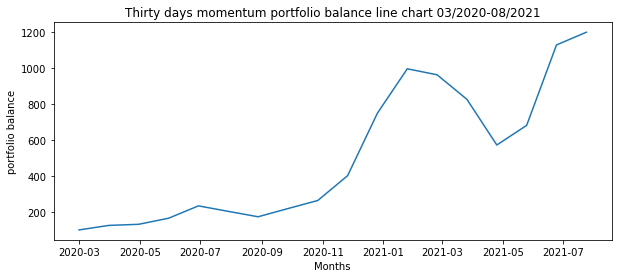

In [57]:
# Looking back period
portfolio_days = 30
dfs = df.resample(str(portfolio_days)+'d', label='left').last()
rets = np.divide((dfs - dfs.shift(1)), dfs.shift(1))
rets.head().round(7)

time = []
position = []
Return_Mom1 = []

# The number of the portfolio cryptos 
numbercryptos = 13
# The initial investment $
portfoliobalance = 100
for index, row in rets.iterrows():
    rowdf = row.to_frame()
    cur_date = rowdf.columns[0]
    end_date = cur_date + datetime.timedelta(days=portfolio_days)
    lg = rowdf[cur_date].nlargest(numbercryptos)

    if end_date not in rets.index:
        break
    lg = rets.loc[end_date, lg.index.values]
    print('The last ' + str(numbercryptos) + 'winners return in the rebalancing day')
    print(lg)
    lg_one= np.add(lg,1)
    portfoliobalance = portfoliobalance * np.power( multiplyList(lg_one) , (1/(numbercryptos)))
    Profit_percentage = str(np.power( multiplyList(lg_one) , (1/(numbercryptos)))-1)
    time.append(cur_date)
    position.append(portfoliobalance)
    Return_Mom1.append(Profit_percentage)
    print('Profit margin:' + str(np.power( multiplyList(lg_one) , (1/(numbercryptos)))-1))
    print('portfolio balance sub-total:' + str(portfoliobalance))
    
    print('----- new line ------')

print('Final portfolio balance:' + str(portfoliobalance))

data1 = {'Date': time ,'Return': Return_Mom1}
data1p=  {'Date': time ,'portfolio balance': position}

plt.figure(figsize=(10,4))
plt.plot(time, position)
plt.xlabel('Months')
plt.ylabel('portfolio balance')
plt.title('Thirty days momentum portfolio balance line chart 03/2020-08/2021')

In [58]:
df1 = pd.DataFrame(data1)
df1=df1.set_index(df1['Date'], drop=False, append=False, inplace=False, verify_integrity=False).drop('Date', 1)
df1.index = pd.to_datetime(df1.index)
df1["Return"] = df1.Return.astype(float)
import seaborn as sns

In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18 entries, 2020-03-01 to 2021-07-24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Return  18 non-null     float64
dtypes: float64(1)
memory usage: 288.0 bytes


In [60]:
dfnr = pd.DataFrame(df1, columns = ['Return']) 
nr = dfnr.mean() * (365/portfolio_days)
nv = dfnr.std() * ((365/portfolio_days) ** 0.5)
print('The annualised normal return for the daily Momentum portfolio is %.8f and its annulized volatility for the daily Momentum portfolio is %.8f' % (nr,nv))

The annualised normal return for the daily Momentum portfolio is 2.23708261 and its annulized volatility for the daily Momentum portfolio is 1.05858437


In [61]:
Sharpe_Ratio = (df1['Return'].mean() - 0.00004417989) / df1['Return'].std()
ASharpe_Ratio=((365/portfolio_days)**0.5) * Sharpe_Ratio
ASharpe_Ratio
print('The annualised Sharpe Ratio for daily Momentum portfolio '+str(ASharpe_Ratio))

The annualised Sharpe Ratio for daily Momentum portfolio 2.1127698020094288


## Thirty days contrarian portfolio

The last 13 winers return in the reblancing day
Series([], Name: 2020-03-31 00:00:00, dtype: float64)
Profit percentage:0.0
portfolio balance sub-total:100.0
----- new line ------
The last 13 winers return in the reblancing day
Klaytn              0.834133
UNUS SED LEO        0.102804
Revain             -0.053619
KuCoin Token       -0.022871
Nexo                0.149742
Holo                0.546451
Hedera Hashgraph    0.279887
Horizen            -0.051887
Theta Fuel          4.361197
XinFin Network      4.854595
NEM                -0.032952
Chiliz              0.484775
Bitcoin Cash       -0.075110
Name: 2020-04-30 00:00:00, dtype: float64
Profit percentage:0.4832726023870917
portfolio balance sub-total:148.32726023870916
----- new line ------
The last 13 winers return in the reblancing day
Solana          0.378150
Eos            -0.095785
Dash           -0.085192
XRP            -0.103883
Synthetix       1.396893
Bitcoin Gold    0.096175
Litecoin       -0.072564
Cosmos         -0.063433

Text(0.5, 1.0, 'Thirty days contrarian portfolio balance line chart 03/2020-08/2021')

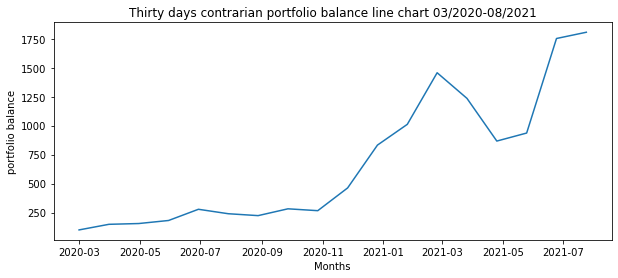

In [62]:
portfolio_days = 30
dfs = df.resample(str(portfolio_days)+'d', label='left').last()
rets = np.divide((dfs - dfs.shift(1)), dfs.shift(1))
rets.head().round(7)

time = []
position = []
Return_Mom1 = []



# The number of the portfolio cryptos 
numbercryptos = 13
# The initial investment $
portfoliobalance = 100
for index, row in rets.iterrows():
    rowdf = row.to_frame()
    cur_date = rowdf.columns[0]
    end_date = cur_date + datetime.timedelta(days=portfolio_days)
    lg = rowdf[cur_date].nsmallest(numbercryptos)

    if end_date not in rets.index:
        break
    lg = rets.loc[end_date, lg.index.values]
    print('The last ' + str(numbercryptos) + ' winers return in the reblancing day')
    print(lg)
    lg_one= np.add(lg,1)
    portfoliobalance = portfoliobalance * np.power( multiplyList(lg_one) , (1/(numbercryptos)))
    #new
    Profit_percentage = str(np.power( multiplyList(lg_one) , (1/(numbercryptos)))-1)
    time.append(cur_date)
    position.append(portfoliobalance)
    #new
    Return_Mom1.append(Profit_percentage)
    print('Profit percentage:' + str(np.power( multiplyList(lg_one) , (1/(numbercryptos)))-1))
    print('portfolio balance sub-total:' + str(portfoliobalance))
    
    print('----- new line ------')
    


print('Final portfolio balance:' + str(portfoliobalance))

data1 = {'Date': time ,'Return': Return_Mom1}
data1p=  {'Date': time ,'portfolio balance': position}

plt.figure(figsize=(10,4))
plt.plot(time, position)
plt.xlabel('Months')
plt.ylabel('portfolio balance')
plt.title('Thirty days contrarian portfolio balance line chart 03/2020-08/2021')

In [63]:
df1 = pd.DataFrame(data1)
df1=df1.set_index(df1['Date'], drop=False, append=False, inplace=False, verify_integrity=False).drop('Date', 1)
df1.index = pd.to_datetime(df1.index)
df1["Return"] = df1.Return.astype(float)
import seaborn as sns

In [64]:
dfnr = pd.DataFrame(df1, columns = ['Return']) 
nr = dfnr.mean() * (365/portfolio_days)
nv = dfnr.std() * ((365/portfolio_days) ** 0.5)
print('The annualised normal return for the daily Momentum portfolio is %.8f and its annulized volatility for the daily Momentum portfolio is %.8f' % (nr,nv))

The annualised normal return for the daily Momentum portfolio is 2.67435751 and its annulized volatility for the daily Momentum portfolio is 1.21941263


In [65]:
Sharpe_Ratio = (df1['Return'].mean() - 0.00004417989) / df1['Return'].std()
ASharpe_Ratio=((365/portfolio_days)**0.5) * Sharpe_Ratio
ASharpe_Ratio
print('The annualised Sharpe Ratio for daily Momentum portfolio '+str(ASharpe_Ratio))

The annualised Sharpe Ratio for daily Momentum portfolio 2.1927114039535978


# Indexes
FTSE

In [67]:
pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

SyntaxError: invalid syntax (<ipython-input-67-1132622a0cf9>, line 1)

[*********************100%***********************]  1 of 1 completed


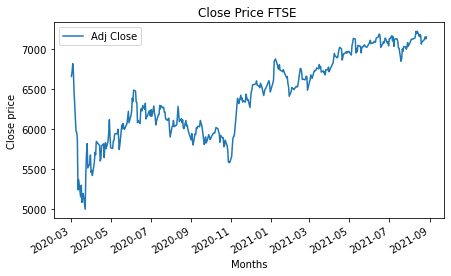

In [68]:
import yfinance as yf
initial_data = yf.download("^FTSE", start="2020-03-01", end="2021-08-31")
index_data_FTSE =  initial_data['Adj Close']
index_data_FTSE.plot(figsize=(7, 4), subplots=True)
plt.title('Close Price FTSE ')
plt.xlabel('Months')
plt.ylabel('Close price')
plt.legend(loc='upper left')

In [69]:
index_data_FTSE.describe()

count     377.000000
mean     6422.056234
std       511.017098
min      4993.899902
25%      6007.100098
50%      6462.600098
75%      6895.299805
max      7220.100098
Name: Adj Close, dtype: float64

In [ ]:
rets = np.divide((index_data_FTSE - index_data_FTSE.shift(376)), index_data_FTSE.shift(376))
retsFTSE= rets.loc[['2021-08-27']]
retsFTSE

In [ ]:
rets = np.divide((index_data_FTSE - index_data_FTSE.shift(1)), index_data_FTSE.shift(1))
rets.head().round(7)
df1 = pd.DataFrame(rets)
#df1.index = pd.to_datetime(df1.index)
df1 = df1.set_axis([ 'Return'], axis=1, inplace=False)
df1["Return"] = df1.Return.astype(float)
import seaborn as sns

In [ ]:
dfnr = pd.DataFrame(df1, columns = ['Return']) 
nr = dfnr.mean() * 365
nv = dfnr.std() * (365 ** 0.5)
print('The annualised normal return for the daily Momentum portfolio is %.8f and its annulized volatility for the daily Momentum portfolio is %.8f' % (nr,nv))

In [ ]:
Sharpe_Ratio = (df1['Return'].mean() - 0.00004417989) / df1['Return'].std()
ASharpe_Ratio=(365**0.5) * Sharpe_Ratio
ASharpe_Ratio
print('The annualised Sharpe Ratio for daily Momentum portfolio '+str(ASharpe_Ratio))

S&P

[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, 'Close price')

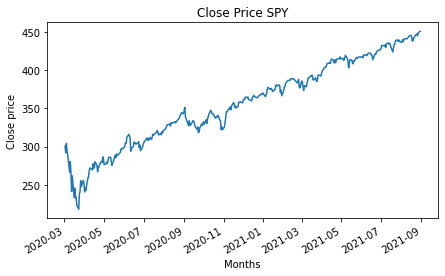

In [70]:
initial_data = yf.download("SPY", start="2020-03-01", end="2021-08-31")
index_data_SPY =  initial_data['Adj Close']
index_data_SPY.plot(figsize=(7, 4), subplots=True)
plt.title('Close Price SPY')
plt.xlabel('Months')
plt.ylabel('Close price')

In [71]:
index_data_SPY.describe()

count    379.000000
mean     355.720276
std       55.851466
min      218.017075
25%      315.303513
50%      358.174591
75%      408.912903
max      450.785828
Name: Adj Close, dtype: float64

In [ ]:
rets = np.divide((index_data_SPY - index_data_SPY.shift(378)), index_data_SPY.shift(378))
retsSPY= rets.loc[['2021-08-30']]
retsSPY

In [ ]:
rets = np.divide((index_data_SPY - index_data_SPY.shift(1)), index_data_SPY.shift(1))
rets.head().round(7)
df1 = pd.DataFrame(rets)
#df1.index = pd.to_datetime(df1.index)
df1 = df1.set_axis([ 'Return'], axis=1, inplace=False)
df1["Return"] = df1.Return.astype(float)
import seaborn as sns

In [ ]:
dfnr = pd.DataFrame(df1, columns = ['Return']) 
nr = dfnr.mean() * 365
nv = dfnr.std() * (365 ** 0.5)
print('The annualised normal return for the daily Momentum portfolio is %.8f and its annulized volatility for the daily Momentum portfolio is %.8f' % (nr,nv))

In [ ]:
Sharpe_Ratio = (df1['Return'].mean() - 0.00004417989) / df1['Return'].std()
ASharpe_Ratio=(365**0.5) * Sharpe_Ratio
ASharpe_Ratio
print('The annualised Sharpe Ratio for daily Momentum portfolio '+str(ASharpe_Ratio))

# Indexes
SSE

[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, 'Close price')

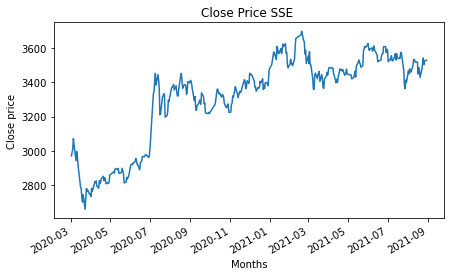

In [73]:
initial_data = yf.download("000001.SS", start="2020-03-01", end="2021-08-31")
index_data_SSE =  initial_data['Adj Close']
index_data_SSE.plot(figsize=(7, 4), subplots=True)
plt.title('Close Price SSE ')
plt.xlabel('Months')
plt.ylabel('Close price')

In [74]:
rets = np.divide((index_data_SSE - index_data_SSE.shift(367)), index_data_SSE.shift(367))
retsSPY= rets.loc[['2021-08-30']]
retsSPY

Date
2021-08-30    0.187557
Name: Adj Close, dtype: float64

In [75]:
rets = np.divide((index_data_SSE - index_data_SSE.shift(1)), index_data_SSE.shift(1))
rets.head().round(7)
df1 = pd.DataFrame(rets)
#df1.index = pd.to_datetime(df1.index)
df1 = df1.set_axis([ 'Return'], axis=1, inplace=False)
df1["Return"] = df1.Return.astype(float)
import seaborn as sns

In [76]:
dfnr = pd.DataFrame(df1, columns = ['Return']) 
nr = dfnr.mean() * 365
nv = dfnr.std() * (365 ** 0.5)
print('The annualised normal return for the daily Momentum portfolio is %.8f and its annulized volatility for the daily Momentum portfolio is %.8f' % (nr,nv))

The annualised normal return for the daily Momentum portfolio is 0.19313785 and its annulized volatility for the daily Momentum portfolio is 0.21072231


In [77]:
Sharpe_Ratio = (df1['Return'].mean() - 0.00004417989) / df1['Return'].std()
ASharpe_Ratio=(365**0.5) * Sharpe_Ratio
ASharpe_Ratio
print('The annualised Sharpe Ratio for daily Momentum portfolio '+str(ASharpe_Ratio))

The annualised Sharpe Ratio for daily Momentum portfolio 0.840025850963567


# Indexes
CCI30

Text(0, 0.5, 'Close price')

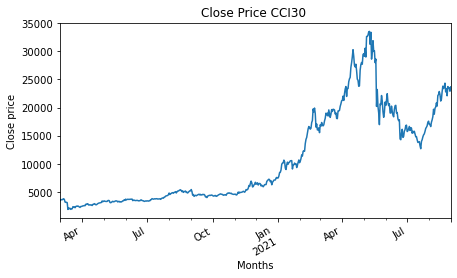

In [79]:
df_CCI30 = pd.read_csv('/Users/abdullahdado/Desktop/FinTech:python/research/Final /final final/cci30.csv')

df_CCI30=df_CCI30.set_index(df_CCI30['Date'], drop=False, append=False, inplace=False, verify_integrity=False).drop('Date', 1)
df_CCI30.index = pd.to_datetime(df_CCI30.index)

index_data_CCI30 =  df_CCI30['Close']
index_data_CCI30.plot(figsize=(7, 4), subplots=True)
plt.title('Close Price CCI30 ')
plt.xlabel('Months')
plt.ylabel('Close price')

In [80]:
index_data_CCI30.describe()

count      549.000000
mean     10726.585082
std       8277.860348
min       1938.490000
25%       3832.600000
50%       6267.950000
75%      17576.800000
max      33483.900000
Name: Close, dtype: float64

In [ ]:
rets_CCI30 = np.divide((index_data_CCI30 - index_data_CCI30.shift(548)), index_data_CCI30.shift(548))
rets_CCI30= rets_CCI30.loc[['2021-08-31']]
rets_CCI30

In [ ]:
rets_CCI30 = np.divide((index_data_CCI30 - index_data_CCI30.shift(1)), index_data_CCI30.shift(1))
rets_CCI30.head().round(7)
df1 = pd.DataFrame(rets_CCI30)
df1 = df1.set_axis([ 'Return'], axis=1, inplace=False)
df1["Return"] = df1.Return.astype(float)
import seaborn as sns

In [ ]:
dfnr = pd.DataFrame(df1, columns = ['Return']) 
nr = dfnr.mean() * 365
nv = dfnr.std() * (365 ** 0.5)
print('The annualised normal return for the daily Momentum portfolio is %.8f and its annulized volatility for the daily Momentum portfolio is %.8f' % (nr,nv))

In [ ]:
Sharpe_Ratio = (df1['Return'].mean() - 0.00004417989) / df1['Return'].std()
ASharpe_Ratio=(365**0.5) * Sharpe_Ratio
ASharpe_Ratio
print('The annualised Sharpe Ratio for daily Momentum portfolio '+str(ASharpe_Ratio))

# Dogecoin

In [ ]:
index_data_Dogecoin =  df['Dogecoin']
index_data_Dogecoin.plot(figsize=(7, 4), subplots=True)
plt.title('Close Price Dogecoin ')
plt.xlabel('Months')
plt.ylabel('Close price')

In [ ]:
rets_Dogecoin = np.divide((index_data_Dogecoin - index_data_Dogecoin.shift(548)), index_data_Dogecoin.shift(548))
rets_Dogecoin= rets_Dogecoin.loc[['2021-08-31']]
rets_Dogecoin

In [ ]:
rets_Dogecoin = np.divide((index_data_Dogecoin - index_data_Dogecoin.shift(1)), index_data_Dogecoin.shift(1))
rets_Dogecoin.describe()
#df1 = pd.DataFrame(rets_Dogecoin)
#df1 = df1.set_axis([ 'Return'], axis=1, inplace=False)
#df1["Return"] = df1.Return.astype(float)

In [ ]:
dfnr = pd.DataFrame(df1, columns = ['Return']) 
nr = dfnr.mean() * 365
nv = dfnr.std() * (365 ** 0.5)
print('The annualised normal return for the daily Momentum portfolio is %.8f and its annulized volatility for the daily Momentum portfolio is %.8f' % (nr,nv))

In [ ]:
Sharpe_Ratio = (df1['Return'].mean() - 0.00004417989) / df1['Return'].std()
ASharpe_Ratio=(365**0.5) * Sharpe_Ratio
ASharpe_Ratio
print('The annualised Sharpe Ratio for daily Momentum portfolio '+str(ASharpe_Ratio))

# Bitcoin

In [ ]:
index_data_Bitcoin =  df['Bitcoin']
index_data_Bitcoin.plot(figsize=(7, 4), subplots=True)
plt.title('Close Price Bitcoin ')
plt.xlabel('Months')
plt.ylabel('Close price')

In [ ]:
rets_Bitcoin = np.divide((index_data_Bitcoin - index_data_Bitcoin.shift(548)), index_data_Bitcoin.shift(548))
rets_Bitcoin= rets_Bitcoin.loc[['2021-08-31']]
rets_Bitcoin

In [ ]:
rets_Bitcoin = np.divide((index_data_Bitcoin - index_data_Bitcoin.shift(1)), index_data_Bitcoin.shift(1))
rets_Bitcoin.head().round(7)
df1 = pd.DataFrame(rets_Bitcoin)
df1 = df1.set_axis([ 'Return'], axis=1, inplace=False)
df1["Return"] = df1.Return.astype(float)
import seaborn as sns

In [ ]:
dfnr = pd.DataFrame(df1, columns = ['Return']) 
nr = dfnr.mean() * 365
nv = dfnr.std() * (365 ** 0.5)
print('The annualised normal return for the daily Momentum portfolio is %.8f and its annulized volatility for the daily Momentum portfolio is %.8f' % (nr,nv))

In [ ]:
Sharpe_Ratio = (df1['Return'].mean() - 0.00004417989) / df1['Return'].std()
ASharpe_Ratio=(365**0.5) * Sharpe_Ratio
ASharpe_Ratio
print('The annualised Sharpe Ratio for daily Momentum portfolio '+str(ASharpe_Ratio))

# Cardano

In [ ]:
index_data_Cardano =  df['Cardano']
index_data_Cardano.plot(figsize=(7, 4), subplots=True)
plt.title('Close Price Cardano ')
plt.xlabel('Months')
plt.ylabel('Close price')

In [ ]:
rets_Cardano = np.divide((index_data_Cardano - index_data_Cardano.shift(548)), index_data_Cardano.shift(548))
rets_Cardano= rets_Cardano.loc[['2021-08-31']]
rets_Cardano


In [ ]:
rets_Cardano = np.divide((index_data_Cardano - index_data_Cardano.shift(1)), index_data_Cardano.shift(1))
rets_Cardano.describe()

#df1 = pd.DataFrame(rets_Cardano)
#df1 = df1.set_axis([ 'Return'], axis=1, inplace=False)
#df1["Return"] = df1.Return.astype(float)
#import seaborn as sns

In [ ]:
rets_Dogecoin.describe()

In [ ]:
dfnr = pd.DataFrame(df1, columns = ['Return']) 
nr = dfnr.mean() * 365
nv = dfnr.std() * (365 ** 0.5)
print('The annualised normal return for the daily Momentum portfolio is %.8f and its annulized volatility for the daily Momentum portfolio is %.8f' % (nr,nv))

In [ ]:
Sharpe_Ratio = (df1['Return'].mean() - 0.00004417989) / df1['Return'].std()
ASharpe_Ratio=(365**0.5) * Sharpe_Ratio
ASharpe_Ratio
print('The annualised Sharpe Ratio for daily Momentum portfolio '+str(ASharpe_Ratio))

# Terra

In [ ]:
index_data_Terra =  df['Terra']
index_data_Terra.plot(figsize=(7, 4), subplots=True)
plt.title('Close Price Terra ')
plt.xlabel('Months')
plt.ylabel('Close price')

In [ ]:
rets_Terra = np.divide((index_data_Terra - index_data_Terra.shift(548)), index_data_Terra.shift(548))
rets_Terra= rets_Terra.loc[['2021-08-31']]
rets_Terra

In [ ]:
rets_Dogecoin.describe()

In [ ]:
rets_Terra = np.divide((index_data_Terra - index_data_Terra.shift(1)), index_data_Terra.shift(1))
rets_Terra.describe()
#df1 = pd.DataFrame(rets_Terra)
#df1 = df1.set_axis([ 'Return'], axis=1, inplace=False)
#df1["Return"] = df1.Return.astype(float)
#import seaborn as sns

In [ ]:
dfnr = pd.DataFrame(df1, columns = ['Return']) 
dfnr.mean()
nr = dfnr.mean() * 365
nv = dfnr.std() * (365 ** 0.5)
print('The annualised normal return for the daily Momentum portfolio is %.8f and its annulized volatility for the daily Momentum portfolio is %.8f' % (nr,nv))

In [ ]:
Sharpe_Ratio = (df1['Return'].mean() - 0.00004417989) / df1['Return'].std()
ASharpe_Ratio=(365**0.5) * Sharpe_Ratio
ASharpe_Ratio
print('The annualised Sharpe Ratio for daily Momentum portfolio '+str(ASharpe_Ratio))

In [ ]:
df

In [ ]:
rets_df = np.divide((df - df.shift(548)), df.shift(548))
rets_df= df.loc[['2021-08-31']]
rets_df